In [1167]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import multiprocessing

In [1168]:
df_2024 = pd.read_parquet('Futures_2024.parquet', engine='pyarrow')
df_2023 = pd.read_parquet('Futures_2023.parquet', engine='pyarrow')

In [1169]:
df = pd.concat([df_2023, df_2024])
df = df[[col for col in df.columns if 'Close' in col]]
df.index = pd.to_datetime(df.index)
filter1 = df.dropna(axis=1, thresh=138428)
filter2 = filter1.loc[:, (df != 0).all(axis=0)]
base_df = filter2.resample('D',origin='2023-01-02 09:15:00').last().dropna()

In [1170]:
df_nifty=pd.read_parquet('Idx_fut.parquet', engine='pyarrow')
df_nifty = df_nifty[[col for col in df_nifty if 'NIFTY_Close' in col]]
df_nifty.index = pd.to_datetime(df_nifty.index)
df_nifty = df_nifty[df_nifty.index > '2023-01-02 09:15:00']
nifty_frame = df_nifty.resample('D',origin='2023-01-02 09:15:00').last().dropna()
nifty_frame.drop(columns = 'BANKNIFTY_Close', inplace=True)
nifty_frame = nifty_frame[nifty_frame.index <'2024-07-02 15:15:00']

In [1171]:
rel_prices = base_df.div(nifty_frame['NIFTY_Close'], axis=0)

In [1172]:
nifty_50 = ["MARUTI_Close", "ITC_Close", "M&M_Close", "TITAN_Close", "EICHERMOT_Close", "HEROMOTOCO_Close", "SBIN_Close", "HINDUNILVR_Close", "TATAMOTORS_Close", "LT_Close", "ICICIBANK_Close", "BAJAJFINSV_Close", "HDFCLIFE_Close", "SBILIFE_Close", "JSWSTEEL_Close", "HINDALCO_Close", "ASIANPAINT_Close", "ADANIPORTS_Close", "HDFCBANK_Close", "COALINDIA_Close", "TCS_Close", "INFY_Close", "NTPC_Close", "AXISBANK_Close", "APOLLOHOSP_Close", "TATASTEEL_Close", "BHARTIARTL_Close", "ADANIENT_Close", "INDUSINDBK_Close", "TECHM_Close", "KOTAKBANK_Close", "BAJFINANCE_Close", "BPCL_Close", "SHRIRAMFIN_Close", "RELIANCE_Close", "ONGC_Close"]
stock_prices = base_df[nifty_50]
relative_prices = rel_prices[nifty_50]

In [1173]:
multiplier = pd.read_csv('instrument_list.csv')
multiplier = multiplier.drop(columns=[col for col in multiplier.columns if col not in ['name', 'segment', 'lot_size']])
multiplier_nfo = multiplier[multiplier['segment'] == 'NFO-FUT']
filtered_df = multiplier_nfo.drop_duplicates(subset='name', keep='first')
valid_stocks = filtered_df['name'].unique()
valid_stock_columns = [f"{stock}_Close" for stock in valid_stocks]
columns_to_keep = [col for col in valid_stock_columns if col in stock_prices.columns]
filtered_price_df = stock_prices[columns_to_keep]
filtered_stock_names = [col.split('_')[0] for col in filtered_price_df.columns]
filtered_multiplier_df = filtered_df[filtered_df['name'].isin(filtered_stock_names)]
filtered_multiplier_df.drop(columns = 'segment', inplace=True)
filtered_multiplier_df.set_index('name', inplace=True)
filtered_multiplier_df.columns = ['mult']
mult_list = filtered_multiplier_df
mult_list.index = mult_list.index + '_Close'

C:\Users\Guest_Account\AppData\Local\Temp\ipykernel_12200\984550555.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_multiplier_df.drop(columns = 'segment', inplace=True)


In [1174]:
relative_prices

,MARUTI_Close,ITC_Close,M&M_Close,TITAN_Close,EICHERMOT_Close,HEROMOTOCO_Close,SBIN_Close,HINDUNILVR_Close,TATAMOTORS_Close,LT_Close,...,BHARTIARTL_Close,ADANIENT_Close,INDUSINDBK_Close,TECHM_Close,KOTAKBANK_Close,BAJFINANCE_Close,BPCL_Close,SHRIRAMFIN_Close,RELIANCE_Close,ONGC_Close
DateTime,,,,,,,,,,,,,,,,,,,,,
2023-01-02 09:15:00,0.461633,0.018314,0.069228,0.141260,0.177625,0.149168,0.033700,0.140765,0.021730,0.114770,...,0.044664,0.211065,0.067565,0.055521,0.100765,0.360693,0.018401,0.075126,0.141531,0.008266
2023-01-03 09:15:00,0.459645,0.018182,0.068605,0.143598,0.176380,0.148894,0.033645,0.139719,0.021646,0.114780,...,0.044728,0.210265,0.068171,0.056099,0.100835,0.362872,0.018498,0.073052,0.140453,0.008190
2023-01-04 09:15:00,0.466330,0.018119,0.068505,0.144010,0.178587,0.149799,0.033630,0.140684,0.021400,0.114813,...,0.044689,0.211512,0.067702,0.056483,0.101254,0.363805,0.018638,0.073038,0.139811,0.008098
2023-01-05 09:15:00,0.471219,0.018359,0.069618,0.142778,0.181164,0.153126,0.033710,0.143671,0.021541,0.116201,...,0.044784,0.212949,0.067379,0.056184,0.101300,0.338405,0.018943,0.072894,0.140282,0.008127
2023-01-06 09:15:00,0.469599,0.018720,0.070867,0.142164,0.181854,0.153554,0.033662,0.144515,0.021374,0.116856,...,0.044532,0.213691,0.066268,0.055100,0.099950,0.335143,0.019310,0.071859,0.142180,0.008243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26 09:15:00,0.509653,0.017750,0.119730,0.140891,0.198750,0.228186,0.035370,0.102589,0.039898,0.150867,...,0.061174,0.133121,0.062660,0.059092,0.075308,0.299768,0.012491,0.125779,0.126789,0.011193
2024-06-27 09:15:00,0.507338,0.017674,0.120538,0.140167,0.196469,0.229229,0.035046,0.102206,0.040402,0.147802,...,0.061319,0.132049,0.062259,0.059901,0.075683,0.297333,0.012652,0.122605,0.126834,0.011109
2024-06-28 09:15:00,0.501595,0.017730,0.118814,0.142056,0.194565,0.233310,0.035411,0.102930,0.041144,0.148150,...,0.060317,0.132371,0.060876,0.059658,0.075219,0.296867,0.012600,0.121479,0.130537,0.011454


In [1175]:
10000000 / (stock_prices.loc['2023-01-02 09:15:00']['HDFCLIFE_Close'] * mult_list.loc['HDFCLIFE_Close'])

mult    15.851629
Name: HDFCLIFE_Close, dtype: float64

In [1176]:
stock_prices.loc['2023-01-02 09:15:00']['HDFCLIFE_Close']

np.float64(573.5)

In [1177]:
class PortfolioMometumStrategy:
    def __init__(self, stock_prices, relative_prices, mult, lookback_period, num_stocks, max_positions, initial_capital=200000000):
        self.stock_prices = stock_prices
        self.relative_prices = relative_prices
        self.mult = mult
        self.lookback_period = lookback_period
        self.num_stocks = min(max_positions / 2, num_stocks)
        self.available_capital = initial_capital
        self.current_positions = {stock: 0 for stock in stock_prices.columns}
        self.pnl_series = pd.Series(index = stock_prices.index)
        self.trade_log = []
        

    def calculate_momentum(self, data, current_time):
        lookback_time = current_time - pd.Timedelta(days=self.lookback_period)
        if lookback_time in data.index:
            return (data.loc[current_time]/ data.loc[lookback_time] - 1)
        else:
            return pd.Series(np.nan, index=data.columns)
    
    def rank_stocks(self, current_time):
        momentum_scores = self.calculate_momentum(self.relative_prices, current_time)
        ranked_stocks = momentum_scores.sort_values(ascending = False)
        return ranked_stocks
    
    def allocate_positions(self, ranked_stocks, current_prices):
        top_stocks = ranked_stocks.head(self.num_stocks)
        bottom_stocks = ranked_stocks.tail(self.num_stocks)


        long_value = self.available_capital / 2
        short_value = self.available_capital / 2

        max_exp_per_stock = 10000000

        long_positions = {}
        short_positions = {}

        for stock in top_stocks.index:
            position_size = min(max_exp_per_stock / (current_prices[stock] * self.mult.loc[stock].values), long_value / (current_prices[stock] * self.mult.loc[stock].values))
            position_cost = position_size * current_prices[stock] * self.mult.loc[stock].values
            if position_cost <= long_value:
                long_positions[stock] = position_size
                long_value -= position_cost
                self.trade_log.append({'date': current_prices.name, 'stock': stock, 'position': 'long', 'size': position_size, 'cost': position_cost, 'trading price' : current_prices[stock]})

        for stock in bottom_stocks.index:
            position_size = min(max_exp_per_stock / (current_prices[stock] * self.mult.loc[stock].values), short_value / (current_prices[stock] * self.mult.loc[stock].values))
            position_cost = position_size * current_prices[stock] * self.mult.loc[stock].values
            if position_cost <= short_value:
                short_positions[stock] = position_size
                short_value -= position_cost
                self.trade_log.append({'date': current_prices.name, 'stock': stock, 'position': 'short', 'size': position_size, 'cost': position_cost, 'trading price': current_prices[stock]})

        return long_positions, short_positions  


    def update_positions(self, long_positions, short_positions, previous_prices, current_prices):

        liquidated_pnl = 0

        for stock in self.current_positions:
            if stock not in long_positions and stock not in short_positions:
                self.current_positions[stock] = 0
                liquidated_pnl = self.current_positions[stock] * (current_prices[stock] - previous_prices[stock]) * self.mult.loc[stock].values

        for stock, position in long_positions.items():
            self.current_positions[stock] = position

        for stock, position in short_positions.items():
            self.current_positions[stock] = -position

        return liquidated_pnl
  

    def calculate_pnl(self, previous_prices, current_prices):
        pnl = 0

        for stock, position in self.current_positions.items():
            price_change = current_prices[stock] - previous_prices[stock]
            pnl += position * price_change * self.mult.loc[stock].values
        return pnl

    def trade(self):
        unique_dates=self.stock_prices.index
        unique_dates=unique_dates[self.lookback_period:]

        next_unique_dates=self.stock_prices.index
        next_unique_dates=next_unique_dates[self.lookback_period-1:]

        for current_time,prev_time in zip(unique_dates,next_unique_dates):
            previous_prices = self.stock_prices.loc[prev_time]
            current_prices = self.stock_prices.loc[current_time]
            ranked_stocks = self.rank_stocks(current_time)
            long_positions, short_positions = self.allocate_positions(ranked_stocks, current_prices)
            self.update_positions(long_positions, short_positions, previous_prices, current_prices)
            pnl = self.calculate_pnl(previous_prices, current_prices)
            liquidated_pnl = self.update_positions(long_positions, short_positions, previous_prices, current_prices)
            self.pnl_series[current_time] = pnl + liquidated_pnl

            self.available_capital += pnl + liquidated_pnl

        return pd.Series(self.pnl_series, index=self.stock_prices.index[self.lookback_period:]).cumsum()

        


In [1178]:
strategy = PortfolioMometumStrategy(stock_prices, relative_prices, mult_list, 15, 5, 20)

In [1179]:
pnl_series = strategy.trade()

In [1180]:
pnl_series

DateTime
2023-01-23 09:15:00    1.414104e+05
2023-01-24 09:15:00    7.070306e+05
2023-01-25 09:15:00    1.722427e+06
2023-01-27 09:15:00    7.018142e+06
2023-01-30 09:15:00    6.748444e+06
                           ...     
2024-06-26 09:15:00    1.665679e+08
2024-06-27 09:15:00    1.661720e+08
2024-06-28 09:15:00    1.659020e+08
2024-07-01 09:15:00    1.658670e+08
2024-07-02 09:15:00    1.659980e+08
Length: 354, dtype: float64

In [1181]:
def plot_pnl(pnl_series):
    plt.figure(figsize=(10, 6))
    pnl_series.plot()
    plt.title('Cumulative PnL')
    plt.xlabel('Date')
    plt.ylabel('Cumulative PnL')
    plt.grid(True)
    plt.show()

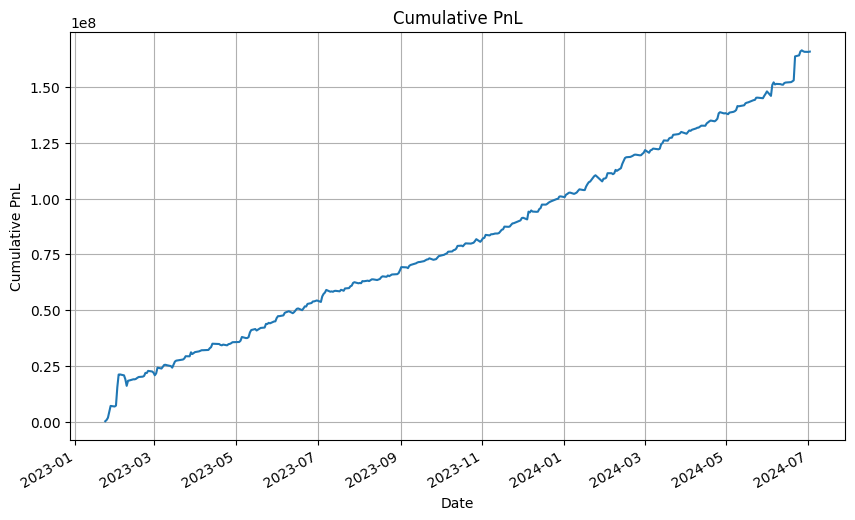

In [1182]:
plot_pnl(pnl_series)

In [1183]:
trade_log_df = pd.DataFrame(strategy.trade_log)


In [1184]:
mult_list.to_csv(r"C:\Users\Guest_Account\Desktop\Futures Strategies\check_3.csv")

In [1185]:
stock_prices.to_csv(r"C:\Users\Guest_Account\Desktop\Futures Strategies\check_4.csv")

In [1186]:
trade_log_df.to_csv(r"C:\Users\Guest_Account\Desktop\Futures Strategies\check_1.csv")

In [1188]:
daily_ret =  100 *(pnl_series.diff() / 200000000 )

In [1189]:
SR = (daily_ret.mean()*252) / (daily_ret.std()*np.sqrt(252))

In [1190]:
SR

np.float64(6.887379194486504)